<a href="https://colab.research.google.com/github/krishConqueror0609/Tinkers/blob/main/XgBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ADL                        2222 non-null   float64
 1   Age                        2222 non-null   float64
 2   AlcoholConsumption         2222 non-null   float64
 3   BMI                        2222 non-null   float64
 4   BehavioralProblems         2222 non-null   float64
 5   CardiovascularDisease      2222 non-null   float64
 6   CholesterolHDL             2222 non-null   float64
 7   CholesterolLDL             2222 non-null   float64
 8   CholesterolTotal           2222 non-null   float64
 9   CholesterolTriglycerides   2222 non-null   float64
 10  Confusion                  2222 non-null   float64
 11  Depression                 2222 non-null   float64
 12  Diabetes                   2222 non-null   float64
 13  DiastolicBP                2222 no

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:47:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



ROC AUC: 0.9670

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       241
           1       0.90      0.93      0.92       204

    accuracy                           0.92       445
   macro avg       0.92      0.92      0.92       445
weighted avg       0.92      0.92      0.92       445



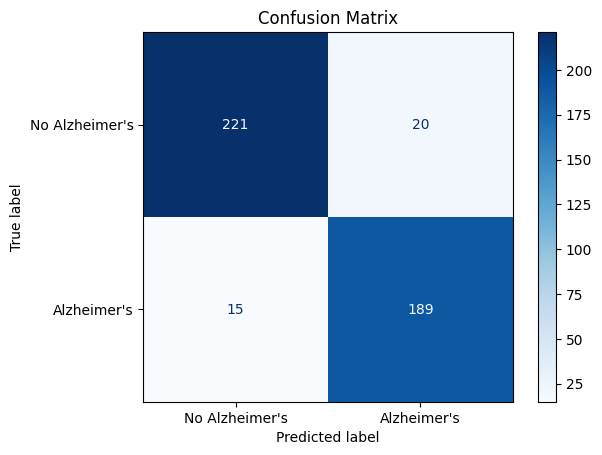

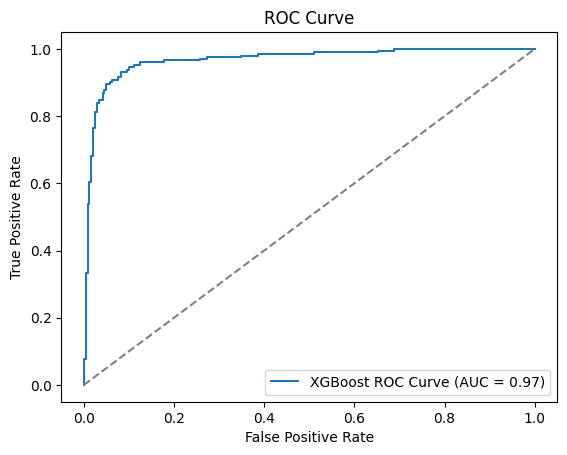

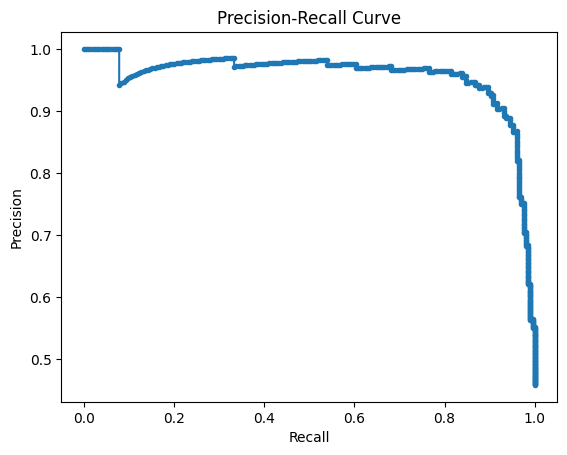

 94%|=================== | 1665/1777 [00:11<00:00]       

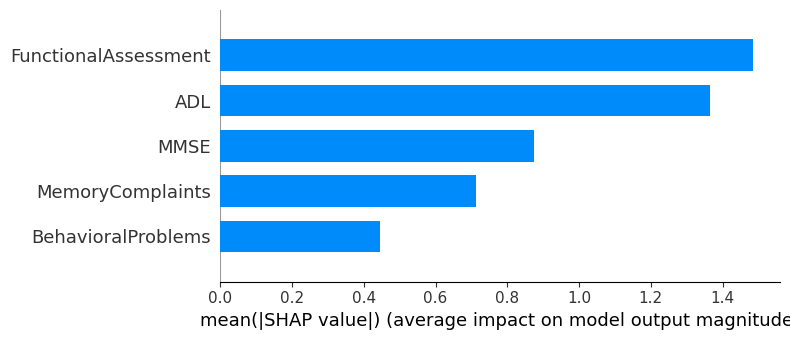

IndexError: invalid index to scalar variable.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
import shap

# Load the preprocessed dataset
file_path = 'preprocessed_corrected_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure data is clean
print("Dataset Info:")
print(data.info())

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Diagnosis'])  # Replace 'Diagnosis_1' with your target column name
y = data['Diagnosis']

# Fill missing values with column mean
X.fillna(X.mean(), inplace=True)

# Encode categorical variables if any
X = pd.get_dummies(X, drop_first=True)

# Confirm data types
print("\nData Types After Encoding:")
print(X.dtypes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train the XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Step 2: Evaluate the Model
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
roc_auc = auc(*roc_curve(y_test, y_pred_prob)[:2])
print(f"\nROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Alzheimer's", "Alzheimer's"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall Curve")
plt.show()

# Step 3: Feature Importance with SHAP
# Initialize SHAP Explainer
explainer = shap.Explainer(xgb_model, X_train)

# Compute SHAP Values
shap_values = explainer(X_train)

# Summary Plot for Feature Importance
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=5)

# Force Plot for a Specific Instance
shap.force_plot(
    explainer.expected_value[1],  # For binary classification, use index 1 for positive class
    shap_values[0, :],  # SHAP values for the first instance
    X_train.iloc[0, :],  # Feature values for the first instance
    matplotlib=True
)


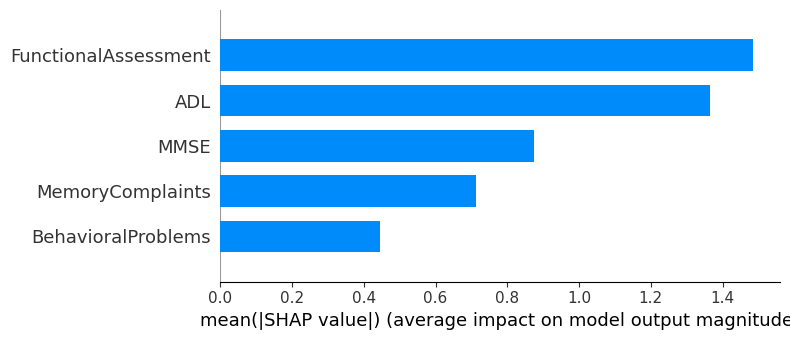

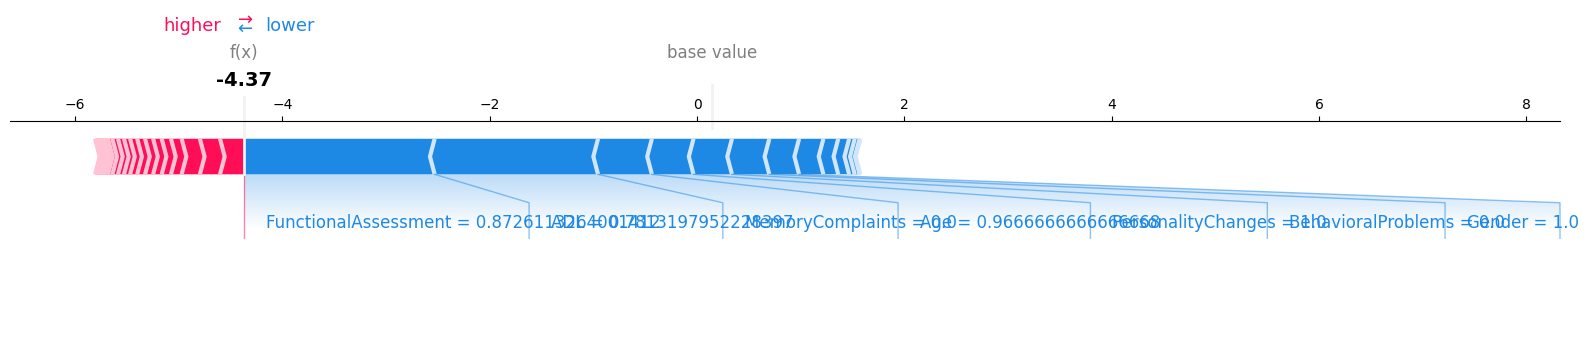

In [5]:
# Step 3: Feature Importance with SHAP
# Initialize SHAP Explainer
explainer = shap.Explainer(xgb_model, X_train)

# Compute SHAP Values
shap_values = explainer(X_train)

# Summary Plot for Feature Importance
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=5)

# Force Plot for a Specific Instance
shap.force_plot(
    explainer.expected_value,  # Expected value for the positive class
    shap_values[0].values,  # SHAP values for the first instance
    X_train.iloc[0],  # Feature values for the first instance
    matplotlib=True
)
